In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Un casino tiene dos tipos de monedas una justa (J) y una sesgada (B), las probabilidades de obtener cara y sello son: Pj = [0.5,0.5] y  Pb = [0.9,0.1] respectivamente.El tipo de moneda se esoge siguiendo esta ley de transición:

In [3]:
T = np.array([[0.8,0.2],[0.2,0.8]])

Por otro lado, la matriz de emisión está dada por:

In [4]:
E = np.array([[0.5,0.5],[0.9,0.1]])

Se realiza un experimento de 8 lanzamientos y se obtiene la siguiente secuencia: [S,C,C,C,S,C,S,C].

a.) Use la distribución de probabilidad a-priori para la moneda justa y sesgada [0.2,0.8]

In [6]:
# Definimos estados y priors
Monedas = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

DictM = {0:'Justa',1:'Sesgada'} 
Dict0= {0: 'Cara', 1:'Sello'}

In [7]:
#Secuencia Observada

Obs = np.array([1,0,0,0,1,0,1,0])

b.) Encuentra la secuencia oculta más probable del tipo de moneda que se elegió en cada lanzamiento y su respectiva probabilidad P.

In [8]:
def GetMonedas(Monedas,N):
    
    CMonedas = list( combinations_with_replacement(Monedas,N) )
    
    print(CMonedas)
    
    Permu = []
    
    for it in CMonedas:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [9]:
HiddenMonedas = GetMonedas(Monedas,8)
HiddenMonedas

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [12]:
#No se como decidir si la moneda fue la justa o la sesgada, se que debo decirlo con la prior, pero no se como.

In [15]:
def GetProb(T,E,Obs,Monedas,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[Monedas[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ Monedas[i+1], Monedas[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], Monedas[i] ]
        
    return p

In [11]:
P = np.zeros(HiddenMonedas.shape[0], dtype=np.float64)

In [16]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenMonedas[i],Prior)
    
print(P)

[9.5551488e-04 2.3887872e-04 6.6355200e-06 5.9719680e-05 6.6355200e-06
 5.9719680e-05 5.9719680e-05 5.9719680e-05 1.0616832e-04 2.6542080e-05
 1.4929920e-05 6.6355200e-06 1.6588800e-06 4.6080000e-08 6.6355200e-06
 1.4929920e-05 4.1472000e-07 3.7324800e-06 6.6355200e-06 1.4929920e-05
 4.1472000e-07 3.7324800e-06 4.1472000e-07 5.9719680e-05 1.4929920e-05
 4.1472000e-07 3.7324800e-06 4.1472000e-07 3.7324800e-06 5.9719680e-05
 2.6542080e-05 7.3728000e-07 6.6355200e-06 7.3728000e-07 6.6355200e-06
 6.6355200e-06 1.0616832e-04 2.6542080e-05 1.8432000e-07 1.6588800e-06
 7.3728000e-07 1.6588800e-06 9.3312000e-07 4.1472000e-07 1.6588800e-06
 4.6080000e-08 6.6355200e-06 1.6588800e-06 9.3312000e-07 4.1472000e-07
 1.0368000e-07 2.8800000e-09 4.1472000e-07 1.4929920e-05 4.1472000e-07
 3.7324800e-06 6.6355200e-06 1.6588800e-06 9.3312000e-07 4.1472000e-07
 1.0368000e-07 2.8800000e-09 4.1472000e-07 9.3312000e-07 2.5920000e-08
 2.3328000e-07 4.1472000e-07 1.4929920e-05 4.1472000e-07 3.7324800e-06
 4.147

ARREGLAR

In [52]:
p_ob_suma = []

for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenMonedas[i],Prior)
    suma = np.sum(P[i])
    
    p_ob_suma.append(suma)
    
print(p_ob_suma)

[0.0009555148800000006, 0.00023887872000000014, 6.635520000000004e-06, 5.9719680000000036e-05, 6.635520000000004e-06, 5.9719680000000036e-05, 5.9719680000000036e-05, 5.9719680000000036e-05, 0.00010616832000000005, 2.6542080000000017e-05, 1.4929920000000009e-05, 6.635520000000004e-06, 1.658880000000001e-06, 4.6080000000000026e-08, 6.635520000000004e-06, 1.4929920000000009e-05, 4.1472000000000026e-07, 3.7324800000000023e-06, 6.635520000000004e-06, 1.4929920000000009e-05, 4.1472000000000026e-07, 3.7324800000000023e-06, 4.1472000000000026e-07, 5.9719680000000036e-05, 1.4929920000000009e-05, 4.1472000000000026e-07, 3.7324800000000023e-06, 4.1472000000000026e-07, 3.7324800000000023e-06, 5.9719680000000036e-05, 2.6542080000000013e-05, 7.372800000000004e-07, 6.635520000000003e-06, 7.372800000000004e-07, 6.635520000000003e-06, 6.635520000000003e-06, 0.00010616832000000005, 2.6542080000000017e-05, 1.843200000000001e-07, 1.658880000000001e-06, 7.372800000000004e-07, 1.658880000000001e-06, 9.33120

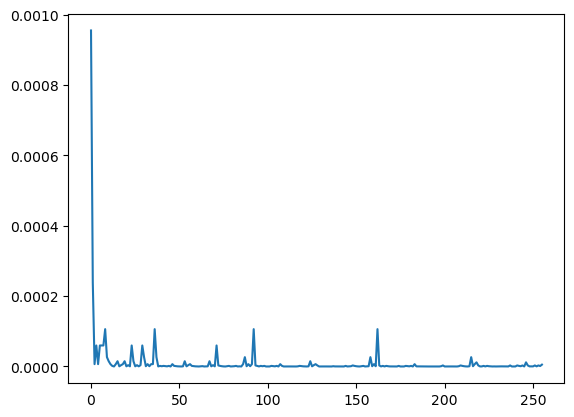

In [17]:
plt.plot(P)

In [19]:
ii = np.where( P == np.amax(P))
print(HiddenMonedas[ii])
print(P[ii])

[[0 0 0 0 0 0 0 0]]
[0.00095551]


La moneda justa es la mas probable

In [21]:
np.sum(P)

0.0026094100000000012

c.) Calcule las probabilidades de cada estado observable (o) como la suma de las probabilidades de todos los estados ocultos. 

In [62]:
ObsMonedas = GetMonedas([1,0,0,0,1,0,1,0],8)

[(1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 0, 0, 0), (1, 1, 1, 1, 1, 0, 0, 0), (1, 1, 1, 1

Traceback (most recent call last):
  File "c:\Users\jessi\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jessi\AppData\Local\Temp\ipykernel_22192\3611602654.py", line 1, in <module>
    ObsMonedas = GetMonedas([1,0,0,0,1,0,1,0],8)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jessi\AppData\Local\Temp\ipykernel_22192\2275664617.py", line -1, in GetMonedas
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\jessi\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jessi\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^

In [61]:
ObsMonedas

NameError: name 'ObsMonedas' is not defined

In [60]:
Nobs = ObsMonedas.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenMonedas.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsMonedas[j],HiddenMonedas[i],Prior)
        
    PObs[j] = np.sum(P)

NameError: name 'ObsMonedas' is not defined

In [ ]:
plt.plot(PObs)

In [ ]:
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii])

d.) Verifique que la suma de todos los estados observables es  1.

In [ ]:
np.sum(PObs)

e.) Depende el resultado de la probabilidad apriori.